In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import nltk

In [2]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\marga\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
data = pd.read_csv('./ukiyo-e_crawler/meta_data/ukiyo-e_artworks_details.csv')
data.shape

(177985, 8)

In [4]:
data.describe()

,Image URL,Artist,Title,Date,Details,Source,Description,Similar Prints
count,177741,177390,168646,151068,166926,177390,82648,177985
unique,177167,153,108133,6497,164733,27,52762,127638
top,https://data.ukiyo-e.org/metro/scaled/nashi.jpg,Utagawa Kunisada,−,"Japanese, Edo period",http://metro.tokyo.opac.jp/tml/tpic/cgi-bin/de...,http://enpaku.waseda.ac.jp/db/enpakunishik/,役者絵,[]
freq,98,37862,2341,7624,98,42321,1355,47861


In [5]:
print(data.columns)

Index(['Image URL', 'Artist', 'Title', 'Date', 'Details', 'Source',
       'Description', 'Similar Prints'],
      dtype='object')


In [6]:
# get the number of non-null values in description column
data['Description'].notnull().sum()

82648

In [7]:
# get the length of the description
data['Description_length'] = data['Description'].apply(lambda x: len(str(x)))
data['Description_length'].describe()

count    177985.000000
mean         70.501739
std         181.497129
min           1.000000
25%           3.000000
50%           3.000000
75%          57.000000
max        6321.000000
Name: Description_length, dtype: float64

In [8]:
# get how many descriotions are lager than 50 characters
len(data[data['Description_length'] > 50])

46867

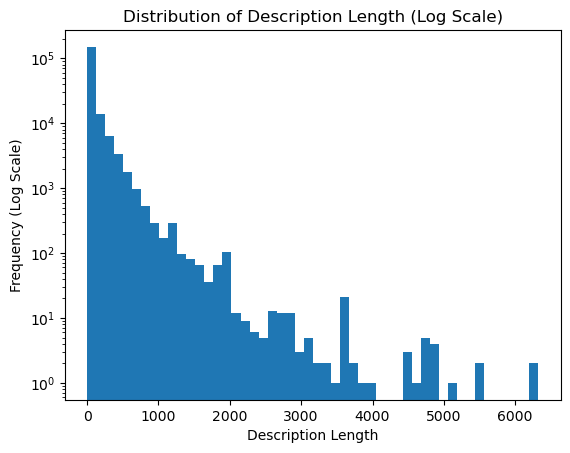

In [9]:
# create a histogram of description length in log scale
plt.hist(data['Description_length'], bins=50, log=True)

# set plot title and labels
plt.title('Distribution of Description Length (Log Scale)')
plt.xlabel('Description Length')
plt.ylabel('Frequency (Log Scale)')

# display the plot
plt.show()

In [10]:
# count the unique words in description

all_strings = ' '.join(data['Description'].dropna().values)
# remove the non-english characters
all_strings = all_strings.encode('ascii', 'ignore').decode('ascii')

words = all_strings.split()
word_counts = Counter(words)


len(word_counts)

99244

In [11]:
# get the top 20 words
top_20_words = word_counts.most_common(20)
top_20_words

[('the', 80190),
 ('of', 60189),
 ('in', 39528),
 ('and', 39071),
 ('a', 37565),
 ('is', 20860),
 ('on', 16381),
 ('by', 15739),
 ('with', 15245),
 ('The', 15240),
 ('to', 14937),
 ('from', 12965),
 ('x', 12864),
 ('at', 11247),
 ('print', 10792),
 ('for', 8935),
 ('Woodblock', 8283),
 ('as', 7853),
 ('no', 7322),
 ('A', 7242)]

In [12]:
# initialize the part-of-speech tagger
tagger = nltk.pos_tag

# extract the nouns from the counter
noun_dict = {}
for word, count in word_counts.items():
    pos = tagger([word])[0][1]
    if pos.startswith('N'):  # check if the part-of-speech tag indicates a noun
        noun_dict[word] = count

print(len(noun_dict))

78161


In [13]:
# find entries with a 'clock' in the description
data['Description'].str.contains('').sum()
# 

82648

In [14]:
# get only entries that have a non-null description
data_desc = data[data['Description'].notnull()]
data_desc.head(2)
# get the top 20 nouns
top_20_nouns = sorted(noun_dict.items(), key=lambda x: x[1], reverse=True)[:20]
top_20_nouns

[('x', 12864),
 ('print', 10792),
 ('Woodblock', 8283),
 ('series', 6962),
 ('woodblock', 6901),
 ('cm', 6791),
 ('print.', 4842),
 ('seal', 4734),
 ('inches', 4179),
 ('Color', 3834),
 ('prints', 3601),
 ('=', 3263),
 ('print,', 3196),
 ('Print', 3002),
 ('left', 2990),
 ('oban', 2913),
 ('right', 2674),
 ('Artist:', 2578),
 ('Fine', 2531),
 ('Title', 2502)]

In [15]:
len(data_desc[data_desc['Description'].str.contains('clock')][['Description']])
# at least 25 of these are likely to be the same image, because they're the same description!

57

In [16]:
#NLP libraries
import spacy, nltk, gensim, sklearn
import pyLDAvis.gensim_models

nlp = spacy.load('en_core_web_sm')

c:\Users\marga\Anaconda3\envs\ada\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [17]:
descs = data_desc[['Description']]

# remove newlines
for _, d in descs.iterrows():
    d.Description = " ".join(d.Description.split())

descs.head()

descs_list = descs['Description'].tolist()

In [18]:
import nltk
# nltk.download('averaged_perceptron_tagger')

test = descs_list[0]
# print("Test", test)
doctest = nlp(test)

# Sentence splitting
sentences = [sent for sent in doctest.sents]
for i in range(0, 3):
    print(f'Sentence {i}', sentences[i], '\n')

# Tokenization
tokens = nltk.word_tokenize(test)
tags = nltk.pos_tag(tokens)
nouns = [word for (word, pos) in tags if pos[0:2] == 'NN']
print(nouns)

Sentence 0 Print. 

Sentence 1 Sixth of series of twelve (first two missing). 

Sentence 2 Korean embassy procession: 

['Print', 'Sixth', 'series', 'twelve', 'procession', 'men', 'hats', 'beards', 'horses', 'bows', 'arrows', 'blowing', 'shells', 'trumpets', 'walking', 'Woodblock', 'paper', 'Inscribed']


In [19]:
# redoing this for all descs

data_desc['Nouns'] = data_desc['Description']

for _, d in data_desc.iterrows():
    desc = " ".join(d.Description.split())
    tokens = nltk.word_tokenize(desc)
    tags = nltk.pos_tag(tokens)
    nouns = [word for (word, pos) in tags if pos[0:2] == 'NN']
    d.Nouns = nouns

data_desc.head()

C:\Users\marga\AppData\Local\Temp\ipykernel_16380\2226010252.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_desc['Nouns'] = data_desc['Description']


,Image URL,Artist,Title,Date,Details,Source,Description,Similar Prints,Description_length,Nouns
0,https://data.ukiyo-e.org/bm/scaled/AN00418884_...,Okumura Masanobu,NaN,1711,https://www.britishmuseum.org/collection/objec...,http://www.britishmuseum.org/research/search_t...,Print. Sixth of series of twelve (first two mi...,[],255,Print. Sixth of series of twelve (first two mi...
2,https://data.ukiyo-e.org/loc/scaled/02127v.jpg,Okumura Masanobu,Courtesan likened to the Chinese sage Zhang Gu...,"[1715, printed later]",http://www.loc.gov/pictures/collection/jpd/ite...,http://www.loc.gov/pictures/search/?sp=2&co=jp...,Print shows a courtesan portraying the Chinese...,[],119,Print shows a courtesan portraying the Chinese...
3,https://data.ukiyo-e.org/bm/scaled/AN00420719_...,Okumura Masanobu,NaN,1686-1764 (artist),https://www.britishmuseum.org/collection/objec...,http://www.britishmuseum.org/research/search_t...,Woodblock print. Kabuki. The actor Sanjo Kanta...,[],105,Woodblock print. Kabuki. The actor Sanjo Kanta...
12,https://data.ukiyo-e.org/bm/scaled/AN00420734_...,Okumura Masanobu,NaN,1686-1764 (artist),https://www.britishmuseum.org/collection/objec...,http://www.britishmuseum.org/research/search_t...,Woodblock print. Kabuki. Kaomise (debut) of ac...,[],137,Woodblock print. Kabuki. Kaomise (debut) of ac...
16,https://data.ukiyo-e.org/honolulu/scaled/7514.jpg,Okumura Masanobu,Three Young Men: A man playing a hand drum,c. 1751,http://www.honoluluacademy.org/art/10475,http://art.honolulumuseum.org/emuseum/view/obj...,This center panel of a triptych depicts a man ...,[],288,This center panel of a triptych depicts a man ...


In [22]:
data_desc.to_csv('data_desc.csv', index=False)

In [20]:
# Uncomment this so that you don't have to rerun the noun parsing again
# data_desc = pd.read_csv('./data_desc.csv')

import re

print(data_desc.Date.dtype)

for _,d in data_desc.iterrows():

   x= re.findall("\d\d\d\d", str(d.Date))
   print(x)

<>:7: DeprecationWarning: invalid escape sequence \d
<>:7: DeprecationWarning: invalid escape sequence \d
C:\Users\marga\AppData\Local\Temp\ipykernel_16380\869220337.py:7: DeprecationWarning: invalid escape sequence \d
  x= re.findall("\d\d\d\d", str(d.Date))


object
['1711']
['1715']
['1686', '1764']
['1686', '1764']
['1751']
['1756']
['1720']
['1716', '1736']
['1711']
['1686', '1764']
['1748']
['1711', '1720']
['1730']
['1704', '1706']
['1705']
['1730']
['1686', '1764']
[]
['1710']
['1741', '1751']
[]
['1744']
['1711']
['1686', '1764']
['1711', '1716']
['1686', '1764']
['1733']
['1930']
[]
['1711']
['1715']
['1748']
['1730']
['1740']
[]
['1734']
['1742']
['1741', '1751']
['1723']
['1740']
[]
['1900']
['1765']
['1754']
['1730']
['1743']
['1740']
['1743']
['1710']
['1711']
['1755']
['1725']
['1686', '1764']
['1890', '1940']
['1686', '1764']
['1730']
['1930']
['1900']
['1686', '1764']
['1711']
['1711', '1716']
['1745']
['1735']
['1739']
['1710']
['1686', '1764']
['1730']
['1705']
['1715']
['1740']
['1711']
['1686', '1764']
['1730']
[]
['1721']
['1700', '1764']
['1730']
['1730']
['1745']
['1710']
['1686', '1764']
['1886']
['1740']
['1741', '1744']
['1760']
['1753']
['1730']
['1740']
['1711']
[]
[]
['1740']
['1745']
['1720']
['1701']
['1730']
[

In [25]:
# Getting artist names manually in order to infer period

# Early Ukiyo-e (Early-Mid 1700s)
early_artists = ['Okumura Masanobu', 'Hishikawa Moronobu', 'Torii Kiyomasu II', 'Nishikawa Sukenobu', 'Torii Kiyonobu II', 'Torii Kiyomasu I', 'Nishimura Shigenaga', 'Torii Kiyonobu I', 'Torii Kiyotada I', 'Okumura Toshinobu']

# Birth of Full-Color Printing (1740s to 1780s)
birth_full_color_artists = ['Katsukawa Shunsho', 'Suzuki Harunobu', 'Isoda Koryusai', 'Katsukawa Shunko', 'Katsukawa Shun\'ei', 'Ippitsusai Buncho', 'Torii Kiyomitsu', 'Ishikawa Toyonobu', 'Torii Kiyotsune', 'Torii Kiyohiro', 'Katsukawa Shunsen']

# Golden Age of Ukiyo-e (1780 to 1804)
golden_age_artists = ['Kitagawa Utamaro', 'Torii Kiyonaga', 'Toshusai Sharaku', 'Hosoda Eishi', 'Katsukawa Shuncho', 'Kubo Shunman', 'Eishosai Choki', 'Kitao Masayoshi', 'Katsukawa Shunzan', 'Chokosai Eisho', 'Utagawa Kunimasa', 'Ichirakutei Eisui']

# Popularization of Woodblock Printing (1804 to 1868): this one is tricky because country opening (1853) is inside that period
popularization_artists = ['Utagawa Kunisada', 'Utagawa Hiroshige', 'Utagawa Kuniyoshi', 'Utagawa Toyokuni I', 'Katsushika Hokusai', 'Utagawa Kunisada II', 'Utagawa Hiroshige II', 'Keisai Eisen', 'Utagawa Hirosada', 'Kikugawa Eizan', 'Totoya Hokkei', 'Utagawa Kuniyasu', 'Utagawa Kuniteru', 'Utagawa Kunikazu', 'Utagawa Yoshitsuya', 'Yashima Gakutei', 'Utagawa Yoshikazu', 'Utagawa Toyoshige', 'Utagawa Toyohiro', 'Utagawa Hirokage', 'Kano Shugen Sadanobu', 'Shunkosai Hokushu', 'Yoshifuji', 'Katsukawa Shuntei', 'Yanagawa Shigenobu', 'Gigado Ashiyuki', 'Hasegawa Sadanobu I', 'Toyokawa Yoshikuni', 'Teisai Hokuba', 'Shotei Hokuju', 'Torii Kiyomine']

# Meiji Period (1868 to 1912)
meiji_artists = ['Toyohara Kunichika', 'Tsukioka Yoshitoshi', 'Toyohara Chikanobu', 'Ochiai Yoshiiku', 'Tsukioka Kogyo', 'Kobayashi Kiyochika', 'Utagawa Yoshitora', 'Mizuno Toshikata', 'Utagawa Yoshitaki', 'Utagawa Kunisada III', 'Ogata Gekko', 'Utagawa Hiroshige III', 'Morikawa Chikashige', 'Utagawa Sadahide', 'Kawanabe Kyosai', 'Utagawa Toyosai', 'Tomioka Eisen', 'Inoue Yasuji', 'Takeuchi Keishu', 'Adachi Ginko', 'Miyagawa Shuntei', 'Watanabe Nobukazu', 'Ikkei', 'Migata Toshihide', 'Shibata Zeshin', 'Utagawa Kuniaki', 'Imao Keinen', 'Kono Bairei', 'Kajita Hanko', 'Utagawa Kunimasa III', 'Torii Kiyosada', 'Watanabe Shotei', 'Utagawa Fusatane', 'Utagawa Kunitoshi', 'Seiko', 'Utagawa Yoshitoyo', 'Shibata Shinsai']

In [26]:
import math

def get_year(date): # date must be a string
    regex = re.findall("\d\d\d\d", date)
    if (len(regex) == 1):
        return int(regex[0]) # return the year
    if (len(regex) == 2):
        return math.floor((int(regex[0]) + int(regex[1]))/2) # as an estimate we take the mean of the proposed time period. How reliable?
    return 0 # If there is no year we return zero, which will be excluded from year analyses.

# what about the "originally in Edo period" ones
# and '17th - 18th' century
# will add them manually

def get_period_simple(year):
    if (year >= 1603 and year < 1853):
        return "Edo (pre-opening)"
    if (year >= 1853 and year < 1868):
        return "Edo (open)"
    if (year >= 1868 and year < 1912):
        return "Meiji"
    return "TBD"

# refine this function with the artist lists

data_desc['Year'] = data_desc['Date'].apply(lambda x: get_year(str(x)))
data_desc['Period'] = data_desc['Year'].apply(lambda x: get_period_simple(x))
data_desc[['Title', 'Date', 'Year', 'Period']].head(50)

<>:4: DeprecationWarning: invalid escape sequence \d
<>:4: DeprecationWarning: invalid escape sequence \d
C:\Users\marga\AppData\Local\Temp\ipykernel_16380\841853157.py:4: DeprecationWarning: invalid escape sequence \d
  regex = re.findall("\d\d\d\d", date)
C:\Users\marga\AppData\Local\Temp\ipykernel_16380\841853157.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_desc['Year'] = data_desc['Date'].apply(lambda x: get_year(str(x)))
C:\Users\marga\AppData\Local\Temp\ipykernel_16380\841853157.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

,Title,Date,Year,Period
0,NaN,1711,1711,Edo (pre-opening)
2,Courtesan likened to the Chinese sage Zhang Gu...,"[1715, printed later]",1715,Edo (pre-opening)
3,NaN,1686-1764 (artist),1725,Edo (pre-opening)
12,NaN,1686-1764 (artist),1725,Edo (pre-opening)
16,Three Young Men: A man playing a hand drum,c. 1751,1751,Edo (pre-opening)
17,Sanogawa Ichimatsu as Uga no Rangiku-maru,1756,1756,Edo (pre-opening)
20,A Stylish Suma: Lady Murasaki Shikibu,early 1720s,1720,Edo (pre-opening)
21,Portrait of Sugawara Michizane.,[between 1716 and 1736],1726,Edo (pre-opening)
22,NaN,1711,1711,Edo (pre-opening)
23,NaN,1686-1764 (artist),1725,Edo (pre-opening)
